In [2]:
import numpy as np
from scipy.linalg import lu, cholesky, solve_triangular
import matplotlib.pyplot as plt


### Definimos las funciones para crear: la matriz de Hilber, el vector b y la solución exacta

In [ ]:
def hilbert_matrix(n):
    return [[1 / (i + j + 1) for j in range(n + 1)] for i in range(n + 1)]

def vector_b(n):
    return [1 / (n + i + 1) for i in range(n + 1)]

def x_exact(n):
    return [1 if i == n else 0 for i in range(n + 1)]


### Definimos las funciones para los metodos LU y Cholesky

In [ ]:
def solve_using_lu(H, b):
    P, L, U = lu(H)
    Pb =  P.T @ b
    y = np.linalg.solve(L, Pb)
    x = np.linalg.solve(U, y)
    return x

def solve_using_cholesky(H, b):
    L_cho = cholesky(H, lower=True)
    y = np.linalg.solve(L_cho, b)
    x = np.linalg.solve(L_cho.T, y)
    return x



### Veamos una prueba de un caso especifico de como se crean los datos y el resultado de nuestros metodos

In [ ]:
from pprint import pprint
n = 4
H = hilbert_matrix(n)
b = vector_b(n)

print("Hilbert Matrix H:")
pprint(H)

print("\nVector b:")
pprint(b)


Hilbert Matrix H:
[[1.0, 0.5, 0.3333333333333333, 0.25, 0.2],
 [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666],
 [0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285],
 [0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125],
 [0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]]

Vector b:
[0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]


In [ ]:
x_lu = solve_using_lu(H, b)
print("Solution using LU factorization:", x_lu)

x_cholesky = solve_using_cholesky(H, b)
print("Solution using Cholesky factorization:", x_cholesky)

Solution using LU factorization: [-1.64243619e-14  3.02841086e-13 -1.29937727e-12  1.95746197e-12
  1.00000000e+00]
Solution using Cholesky factorization: [-2.72532127e-15  5.60310963e-14 -2.56199707e-13  4.02420241e-13
  1.00000000e+00]


## Veamos el error para n = 2,3,...,13

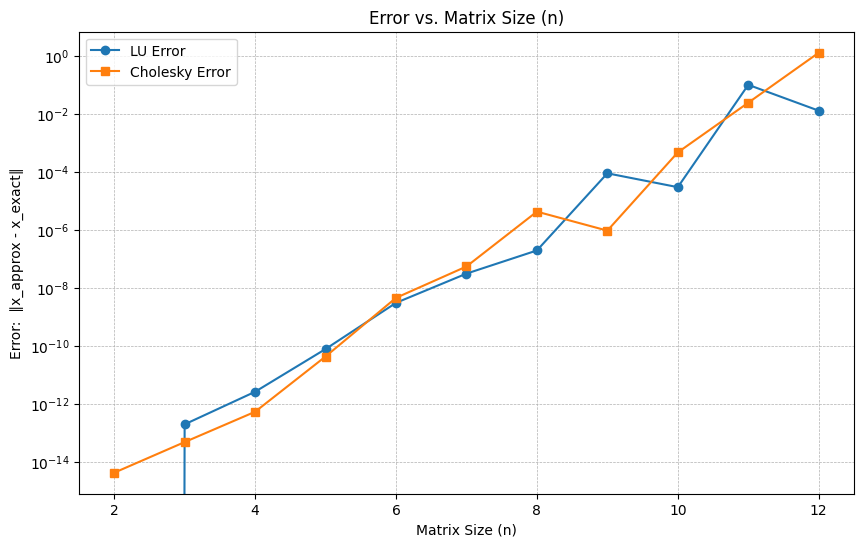

In [ ]:
n_values = range(2, 13)
errors_lu = []
errors_cholesky = []

for n in n_values:
    H = hilbert_matrix(n)
    b = vector_b(n)
    _x_exact = x_exact(n)

    x_lu = solve_using_lu(H, b)
    x_cholesky = solve_using_cholesky(H, b)

    errors_lu.append(np.linalg.norm(x_lu - _x_exact))
    errors_cholesky.append(np.linalg.norm(x_cholesky - _x_exact))

plt.figure(figsize=(10, 6))
plt.semilogy(n_values, errors_lu, label="LU Error", marker='o')
plt.semilogy(n_values, errors_cholesky, label="Cholesky Error", marker='s')
plt.title("Error vs. Matrix Size (n)")
plt.xlabel("Matrix Size (n)")
plt.ylabel("Error:  ∥x_approx - x_exact∥")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()




# Análisis de la Gráfica: Error vs Tamaño de la Matriz $n $

## Conclusiones:

### 1. Errores Crecientes con el Tamaño de la Matriz $n $
   - Tanto el error de **LU** como el de **Cholesky** aumentan exponencialmente a medida que el tamaño $n$ de la matriz de Hilbert crece.
   - Esto ocurre porque las matrices de Hilbert son mal condicionadas, lo que genera inestabilidad numérica para valores grandes de $n$.

---

### 2. Mayor Precisión Inicial para Cholesky $ n < 8$
   - Para matrices pequeñas a moderadas $n < 8$ , el método **Cholesky** muestra un error ligeramente menor que **LU**.
   - Esto demuestra que Cholesky es más eficiente y preciso al trabajar con matrices definidas positivas de tamaño reducido.

---

### 3. Errores Similares para  $n > 8$
   - Para $n > 8 $, los errores de ambos métodos divergen ligeramente, pero siguen un comportamiento similar.
   - Esto indica que el mal condicionamiento de la matriz y los límites de precisión numérica tienen un mayor impacto que las diferencias entre los algoritmos.

---

### 4. Crecimiento Exponencial del Error
   - Los errores crecen de manera exponencial, desde valores del orden de $10^{-14}$ para matrices pequeñas, hasta valores del orden de $10^{-2}$ para  $n = 12$.

---

### 5. Limitaciones Numéricas y Restricción de Cholesky para $n > 12$
   - Dado que para $ n > 13$ la precisión numérica se degrada significativamente, el algoritmo de Cholesky no identifica la matriz como definida positiva (aunque lo es).
   - Por esta razón, el análisis se limitó a $n \leq 12 $, lo cual es suficiente para observar y analizar el comportamiento de los errores.


# (5) Utilice su algoritmo desarrollado en la parte a) para resolver el sistema lineal de ecuaciones para $n = 1000$ y $f (x) = sen(2πx)$. Compare su solución aproximada con la solución exacta $T (x) = \frac{ sin(2πx)}{ (4π2)}$

In [3]:

n = 1000
A = np.diag([2.] * (n+1)) + np.diag([-1.] * n, k=1) + np.diag([-1.] * n, k=-1)
A[0,0] = A[-1,-1] = 1.
A[0,1] = A[-1,-2] = 0.
x = np.arange(0, n+1) / n
b = np.sin(2 * np.pi * x) / n**2
b[0] = b[-1] = 0.

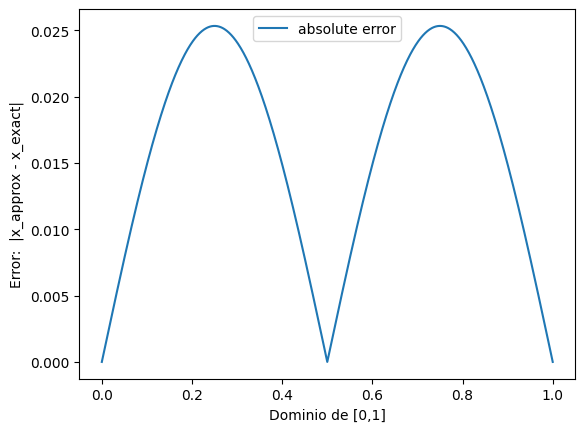

In [9]:
T_approx = solve_triangular(A, b, lower=False)
T_exact = np.sin(2 * np.pi * x) / (4 * np.pi**2)

plt.plot(x, np.absolute(T_approx-T_exact), label="absolute error")

plt.xlabel("Dominio de [0,1]")
plt.ylabel("Error:  |x_approx - x_exact|")
plt.legend()
plt.show()